for this part, will implement the epsilon greedy algorithm comparing to the greedy algorithm

In [1]:
# global condition

import numpy as np
import matplotlib.pyplot as plt
import random

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


In [2]:
# define the bandit arm
class BanditArm:
    def __init__(self, p):
        # p: the win rate
        self.p = p
         # p_estimate: the estimated win rate
        self.p_estimate = 0
         # N: the number of pulling times
        self.N = 0

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        # x: the new result of pulling the bandit arm
        self.N += 1
        self.p_estimate = self.p_estimate + 1 / self.N * (int(x) - self.p_estimate)  

optimal j: 2
mean estimate: 0.22285714285714275
mean estimate: 0.5070821529745049
mean estimate: 0.7541142303968986
total reward earned: 7268.0
overall win rate: 0.7268
num_times_explored: 1062
num_times_exploited: 8938
num times selected optimal bandit: 9297


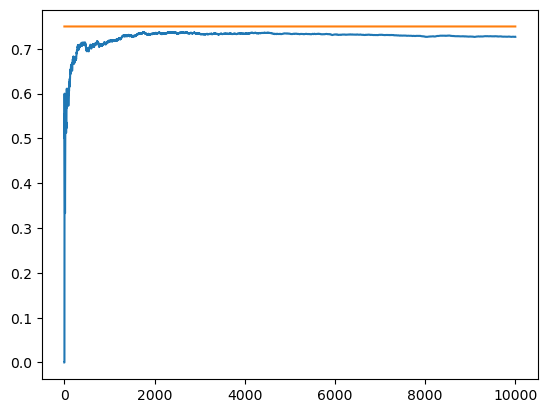

In [3]:
def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print('optimal j:', optimal_j)

    for i in range(NUM_TRIALS):
        
        # use epsilon greedy algorithm to choose the next bandit arm
        if np.random.random() < EPS:
            num_times_explored += 1
            # select the bandit arm randomly
            j = random.randint(0, len(bandits) - 1)
        else:
            num_times_exploited += 1
            # select the bandit arm with highest p_estimate
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the bandit arm
        x = bandits[j].pull()
        # log the reward
        rewards[i] = x
        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    # print the estimated mean
    for b in bandits:
        print('mean estimate:', b.p_estimate)

    # print the total reward
    print('total reward earned:', rewards.sum())
    print('overall win rate:', rewards.sum() / NUM_TRIALS)
    print('num_times_explored:', num_times_explored)
    print('num_times_exploited:', num_times_exploited)
    print('num times selected optimal bandit:', num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == '__main__':
  experiment()
        